<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Kap 5: Gravimetrie
# Schweremodellierung
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

## 3D sphere

$$
 g(x) = {{4}\over{3}} \pi G \Delta\rho R^3 {{D}\over{(x^2 + D^2)^{3/2}}}
$$

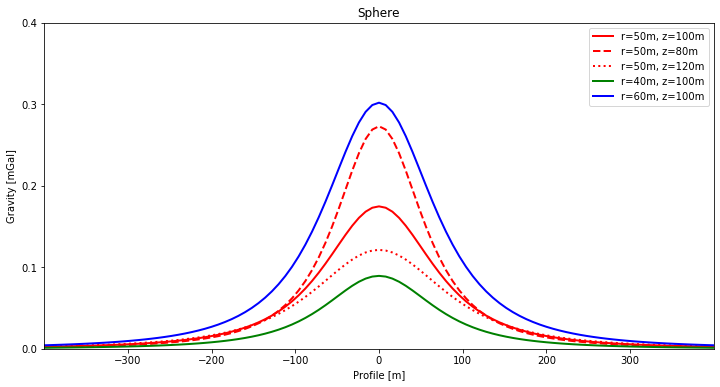

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# define parameter values
G    = 6.672e-11      # m^3/kg/s^2

def boug_sphere(x,z=100.,r=50.,drho=500.):
    # Bouguer gravity of solid sphere
    boug = 4./3.*np.pi*G*drho * r**3*z/(x**2+z**2)**(3/2)
    return boug

# define geometry
xmin  = -400.
xmax  = +400.
xstep = 101
x = np.linspace(xmin,xmax,xstep)
# run model
boug1 = boug_sphere(x)
boug2 = boug_sphere(x,z=80)
boug3 = boug_sphere(x,z=120)
boug4 = boug_sphere(x,r=40)
boug5 = boug_sphere(x,r=60)

# plot Bouguer anomaly
plt.figure(figsize=(12.0, 6.0))
plt.title('Sphere')
plt.xlim([-400,400])
plt.xticks([x for x in np.linspace(-300,300,7)])
plt.xlabel('Profile [m]')
plt.ylim([0,0.4])
plt.yticks([y for y in np.linspace(0,0.4,5)])
plt.ylabel('Gravity [mGal]')
plt.plot(x,1.e5*boug1,linewidth=2.0,linestyle='-',color='red',label='r=50m, z=100m')
plt.plot(x,1.e5*boug2,linewidth=2.0,linestyle='--',color='red',label='r=50m, z=80m')
plt.plot(x,1.e5*boug3,linewidth=2.0,linestyle=':',color='red',label='r=50m, z=120m')
plt.plot(x,1.e5*boug4,linewidth=2.0,linestyle='-',color='green',label='r=40m, z=100m')
plt.plot(x,1.e5*boug5,linewidth=2.0,linestyle='-',color='blue',label='r=60m, z=100m')
plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define geometry
xmin  = -400.
xmax  = +400.
xstep = 11
x = np.linspace(xmin,xmax,xstep)
print(x)

## Horizontal cylinder

$$
 g(x) = 2 \pi G \Delta\rho R^2 {{D}\over{(x^2 + D^2)}}
$$

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# define parameter values
G    = 6.672e-11      # m^3/kg/s^2

def boug_sphere(x,z=100.,r=50.,drho=500.):
    # Bouguer gravity of solid sphere
    boug = 4./3.*np.pi*G*drho * r**3*z/(x**2+z**2)**(3/2)
    return boug

def boug_cylinder(x,z=100.,r=50.,drho=500.):
    # Bouguer gravity of solid horizontal cylinder
    boug = 2.*np.pi*G*drho * r**2*z/(x**2+z**2)
    return boug

# define geometry
xmin  = -400.
xmax  = +400.
xstep = 101
x = np.linspace(xmin,xmax,xstep)
# run model
bougs = boug_sphere(x)
boug1 = boug_cylinder(x)
boug2 = boug_cylinder(x,z=80)
boug3 = boug_cylinder(x,z=120)
boug4 = boug_cylinder(x,r=40)
boug5 = boug_cylinder(x,r=60)

# plot Bouguer anomaly
plt.figure(figsize=(12.0, 6.0))
plt.title('Cylinder')
plt.xlim([-400,400])
plt.xticks([x for x in np.linspace(-300,300,7)])
plt.xlabel('Profile [m]')
plt.ylim([0,0.8])
plt.yticks([y for y in np.linspace(0,0.8,9)])
plt.ylabel('Gravity [mGal]')
plt.plot(x,1.e5*bougs,linewidth=1.0,linestyle=':',color='black',label='sphere')
plt.plot(x,1.e5*boug1,linewidth=2.0,linestyle='-',color='red',label='r=50m, z=100m')
#plt.plot(x,1.e5*boug2,linewidth=2.0,linestyle='--',color='red',label='r=50m, z=80m')
#plt.plot(x,1.e5*boug3,linewidth=2.0,linestyle=':',color='red',label='r=50m, z=120m')
#plt.plot(x,1.e5*boug4,linewidth=2.0,linestyle='-',color='green',label='r=40m, z=100m')
#plt.plot(x,1.e5*boug5,linewidth=2.0,linestyle='-',color='blue',label='r=60m, z=100m')
plt.legend()

## Inclined rod

$$
\begin{array}{rcl}
 g(x) & = & {{G \pi R^2 \Delta\rho}\over{x \sin\alpha}}
         \left[
         {{x + D \cot\alpha}\over{\sqrt{(D \sin^{-1} \alpha)^2 + 2 x D \cot\alpha + x^2}}}
       -  {{x + D\cot\alpha + L \cos\alpha}\over{\sqrt{(L+D \sin^{-1}\alpha)^2 + x^2 + 2x(L\cos\alpha + D\cot\alpha)}}}
     \right]
\end{array}
$$

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# define parameter values
G    = 6.672e-11      # m^3/kg/s^2

def boug_sphere(x,z=100.,r=50.,drho=500.):
    # Bouguer gravity of solid sphere
    boug = 4./3.*np.pi*G*drho * r**3*z/(x**2+z**2)**(3/2)
    return boug

def boug_rod(x,z=50.,r=50.,l=200.,alpha=90.,drho=500.):
    # Bouguer gravity of inclined rod
    d2r = np.pi/180.
    
    boug = (
    G*np.pi*r**2*drho / ((x)*np.sin(alpha*d2r))
    *(
    (x + z/np.tan(alpha*d2r)) / np.sqrt(z**2/np.sin(alpha*d2r)**2 + 2.*x*z/np.tan(alpha*d2r) + x**2)
    -(x + z/np.tan(alpha*d2r) + l*np.cos(alpha*d2r)) / np.sqrt((l+z/np.sin(alpha*d2r))**2 + x**2
                              + 2.*x*(l*np.cos(alpha*d2r)+z/np.tan(alpha*d2r)))
    ))         
    return boug

# define geometry
xmin  = -400.
xmax  = +400.
xstep = 101
tiny  = 1.e-10
x = np.linspace(xmin,xmax,xstep)+tiny
# run model
bougs = boug_sphere(x)
boug1 = boug_rod(x)
boug2 = boug_rod(x,l=100)
boug3 = boug_rod(x,l=50)
boug4 = boug_rod(x,l=50,alpha=55)
boug5 = boug_rod(x,l=50,alpha=155)

# plot Bouguer anomaly
plt.figure(figsize=(12.0, 6.0))
plt.title('Rod')
plt.xlim([-400,400])
plt.xticks([x for x in np.linspace(-300,300,7)])
plt.xlabel('Profile [m]')
plt.ylim([0,0.5])
plt.yticks([y for y in np.linspace(0,0.5,6)])
plt.ylabel('Gravity [mGal]')
plt.text(-300,0.45,'r=50m')
plt.text(-300,0.40,'z=50m')
plt.plot(x,1.e5*bougs,linewidth=1.0,linestyle=':',color='black',label='sphere')
plt.plot(x,1.e5*boug1,linewidth=2.0,linestyle='-',color='red',label='l=200m,$\\alpha$=90')
plt.plot(x,1.e5*boug2,linewidth=2.0,linestyle='--',color='red',label='l=100m,$\\alpha$=90')
plt.plot(x,1.e5*boug3,linewidth=2.0,linestyle=':',color='red',label='l=50m,$\\alpha$=90')
plt.plot(x,1.e5*boug4,linewidth=2.0,linestyle='-',color='green',label='l=50m,$\\alpha$=45')
plt.plot(x,1.e5*boug5,linewidth=2.0,linestyle='-',color='blue',label='l=50m,$\\alpha$=135')
plt.legend()

## 2D inclined plate

## 2D fault

$$
g(x) = 2 G \Delta\rho T 
        \left\{
        \pi + \arctan\left[ {{x}\over{D_1}} + \cot{\alpha} \right]
            - \arctan\left[ {{x}\over{D_2}} + \cot{\alpha} \right]
        \right\}
$$

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# define parameter values
G    = 6.672e-11      # m^3/kg/s^2

def boug_sphere(x,z=100.,r=50.,drho=500.):
    # Bouguer gravity of solid sphere
    boug = 4./3.*np.pi*G*drho * r**3*z/(x**2+z**2)**(3/2)
    return boug

def boug_fault(x,drho=500.,d1=150.,d2=100.,t=150.,alpha=90.):
    # Bouguer gravity of fault
    d2r = np.pi/180.
    boug = (2.*G*drho*t*(np.pi 
                         + np.arctan((x/d1)+(1./np.tan(alpha*d2r))) 
                         - np.arctan((x/d2)+(1./np.tan(alpha*d2r)))))
    boug = boug - 2.*G*drho*t*np.pi        
    return boug

# define geometry
xmin  = -400.
xmax  = +400.
xstep = 101
tiny  = 1.e-10
x = np.linspace(xmin,xmax,xstep)+tiny
# run model
bougs = boug_sphere(x)
boug1 = boug_fault(x)
boug2 = boug_fault(x,alpha=30)
boug3 = boug_fault(x,alpha=150)

# plot Bouguer anomaly
plt.figure(figsize=(12.0, 6.0))
plt.title('Fault')
plt.xlim([-400,400])
plt.xticks([x for x in np.linspace(-300,300,7)])
plt.xlabel('Profile [m]')
plt.ylim([-1.0,1.0])
plt.yticks([y for y in np.linspace(-1.0,1.0,5)])
plt.ylabel('Gravity [mGal]')
plt.text(-300,-0.50,'D$_1$=150m')
plt.text(-300,-0.60,'D$_2$=100m')
plt.text(-300,-0.70,'T=150m')
plt.plot(x,1.e5*bougs,linewidth=1.0,linestyle=':',color='black',label='sphere')
plt.plot(x,1.e5*boug1,linewidth=2.0,linestyle='-',color='red',label='$\\alpha$=90')
plt.plot(x,1.e5*boug2,linewidth=2.0,linestyle='--',color='red',label='$\\alpha$=30')
plt.plot(x,1.e5*boug3,linewidth=2.0,linestyle=':',color='red',label='$\\alpha$=150')

plt.legend()